In [32]:
import os
import pandas as pd
import json
import numpy as np
from collections import OrderedDict

stat_file_name = 'df_metrics.csv'
MEAS_PATH = '../results/10th_run/'
DATA_PATH = '/media/balint/Backup1/data/1d-class-datasets/interpolated-3rd-run/'
TIMES = ['0.5hrs', '1hrs', '1.5hrs', '2hrs', '2.5hrs'] # sorted(os.listdir(MEAS_PATH))
MEAS_TYPES = os.listdir(os.path.join(MEAS_PATH, TIMES[0]))
NETWORKS = os.listdir(os.path.join(MEAS_PATH, TIMES[0], MEAS_TYPES[0])) # ['inception', 'mcdcnn', 'cnn']
VAL_FOLDERS = sorted([ n for n in os.listdir(os.path.join(MEAS_PATH, TIMES[0], MEAS_TYPES[0], NETWORKS[0], 'train-test_itr_0')) if 'cv' in n])
DATA_FOLDERS = sorted([os.path.join(DATA_PATH) for t in MEAS_TYPES])

In [45]:
for tp in MEAS_TYPES:
    cnts = []
    for time in TIMES:
        pth = os.path.join(DATA_PATH, time, tp, 'sampled/train-test')
        d = os.path.join(pth, '..', 'dictionary.csv')
        di = pd.read_csv(d)
        name, label = list(di.iloc[:, 0]), list(di.iloc[:, 1])
        x_train = np.load(os.path.join(pth, 'x_train.npy'))
        x_test = np.load(os.path.join(pth, 'x_test.npy'))
        y_train = np.load(os.path.join(pth, 'y_train.npy'))
        y_test = np.load(os.path.join(pth, 'y_test.npy'))
        data = np.vstack([x_train, x_test])
        labels = np.concatenate([y_train, y_test])
        el, cnt = np.unique(labels, return_counts=True)
        counts = {}
        for n, l in zip(name, label):
            counts[n] = cnt[l]
        # print(tp, time, cnt[0])
        cnts.append(cnt[0])
    print(tp, cnts)

hela-mdamb231-mcf7-lclc [216, 339, 365, 325, 330]
mdamb231-mcf7 [217, 707, 885, 325, 330]
preo-hela-breastcancer-lclc [214, 339, 365, 373, 374]
hela-breastcancer-lclc [216, 339, 365, 373, 374]
breastcancer-hela [423, 810, 852, 796, 729]
preo-hela-mdamb231-mcf7-lclc [214, 339, 365, 325, 330]
mdamb231-mcf7-hela [217, 707, 852, 325, 330]


In [5]:
stats_dict = {}

for tp in MEAS_TYPES:
    if not tp in stats_dict:
        stats_dict[tp] = {}
    for nw in NETWORKS:
        if not nw in stats_dict[tp]:
            stats_dict[tp][nw] = {}
        for tm in TIMES:    
            precision, accuracy, recall, duration = [], [], [], []
            for fd in VAL_FOLDERS:
                df = pd.read_csv(os.path.join(MEAS_PATH, tm, tp, nw, 'train-test_itr_0', fd, stat_file_name))
                precision.append(df.precision.item())
                accuracy.append(df.accuracy.item())
                recall.append(df.recall.item())
                duration.append(df.duration.item())
            stats_dict[tp][nw][tm] = {
                'precision': [np.round(np.mean(precision), 2), np.round(np.std(precision), 2), np.round(np.max(precision), 2)],
                'accuracy': [np.round(np.mean(accuracy), 2), np.round(np.std(accuracy), 2), np.round(np.max(accuracy), 2)],
                'recall': [np.round(np.mean(recall), 2), np.round(np.std(recall), 2), np.round(np.max(recall), 2)],
                'duration': [np.round(np.mean(duration), 2), np.round(np.std(duration), 2), np.round(np.max(duration), 2)]
            }
                    
                
                    
with open('stats.json', 'w') as fp:
    json.dump(stats_dict, 
              fp, 
              sort_keys=False,
              indent=4,
              separators=(',', ': ')
              )

In [6]:
stats_dict = {}
for nw in NETWORKS:
    if not nw in stats_dict:
        stats_dict[nw] = {}
    for tp in MEAS_TYPES:
        if not tp in stats_dict[nw]:
            stats_dict[nw][tp] = {}
        l = []
        for tm in TIMES:    
            precision, accuracy, recall, duration = [], [], [], []
            for fd in VAL_FOLDERS:
                df = pd.read_csv(os.path.join(MEAS_PATH, tm, tp, nw, 'train-test_itr_0', fd, stat_file_name))
                precision.append(df.precision.item())
                accuracy.append(df.accuracy.item())
                recall.append(df.recall.item())
                duration.append(df.duration.item())
            stats_dict[nw][tp][tm] = {
                # 'precision': [np.round(np.mean(precision), 2), np.round(np.std(precision), 2), np.round(np.max(precision), 2)],
                'accuracy': [np.round(np.mean(accuracy), 2), np.round(np.std(accuracy), 2), np.round(np.max(accuracy), 2)],
                # 'recall': [np.round(np.mean(recall), 2), np.round(np.std(recall), 2), np.round(np.max(recall), 2)],
                # 'duration': [np.round(np.mean(duration), 2), np.round(np.std(duration), 2), np.round(np.max(duration), 2)]
            }
            l.append([precision, accuracy, recall, duration])
        stats_dict[nw][tp] = [np.round(np.mean(e[1]), 2) for e in l]
        # {
        #     # 'precision': [[np.mean(e[0]), np.std(e[0]), np.max(e[0])] for e in l],
        #     'accuracy': [np.mean(e[1]) for e in l],
        #     # 'recall': [[np.mean(e[2]), np.std(e[2]), np.max(e[2])] for e in l],
        #     # 'duration': [[np.mean(e[3]), np.std(e[3]), np.max(e[3])] for e in l]
            
        #     # 'precision': np.mean([np.mean(e[0]) for e in l]),
        #     # 'accuracy': np.mean([np.mean(e[1]) for e in l]),
        #     # 'recall': np.mean([np.mean(e[2]) for e in l]),
        #     # # 'duration': np.mean([np.mean(e[3]) for e in l]),
        #     # 'best_time': TIMES[np.argmax([np.mean(e[1]) for e in l])]
        # }
                    
                
                    
# with open('stats.json', 'w') as fp:
#     json.dump(stats_dict, 
#               fp, 
#               sort_keys=False,
#               indent=4,
#               separators=(',', ': ')
#               )

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import matplotlib as mpl

# cm = cmap.get_cmap('Set1', 7)
cm = ['#32CD32','#00bfff', '#ff0000','#FFA500','#9932cc','#964B00','#808080']
names = {
    'cnn': 'CNN',
    'mlp': 'MLP',
    'mcdcnn': 'MCDCNN',
    'fcn': 'FCN',
    'resnet': 'ResNet',
    'inception': 'Inception'
}

cell_types = {
    'preo':'MC3T3-E1',
    'hela':'HeLa',
    'mcf7':'MCF-7',
    'mdamb231':'MDA MB 231',
    'lclc':'LCLC-103H',
    'breastcancer':'Breastcancer'
}

def format_cell_types(st):
    selected_types = sorted([ cell_types[tp] for tp in st.split('-')])
    return ' | '.join(selected_types)

/tmp/ipykernel_55087/227641697.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[n//3, n%3].set_xticklabels([i*0.5 for i in range(6)])


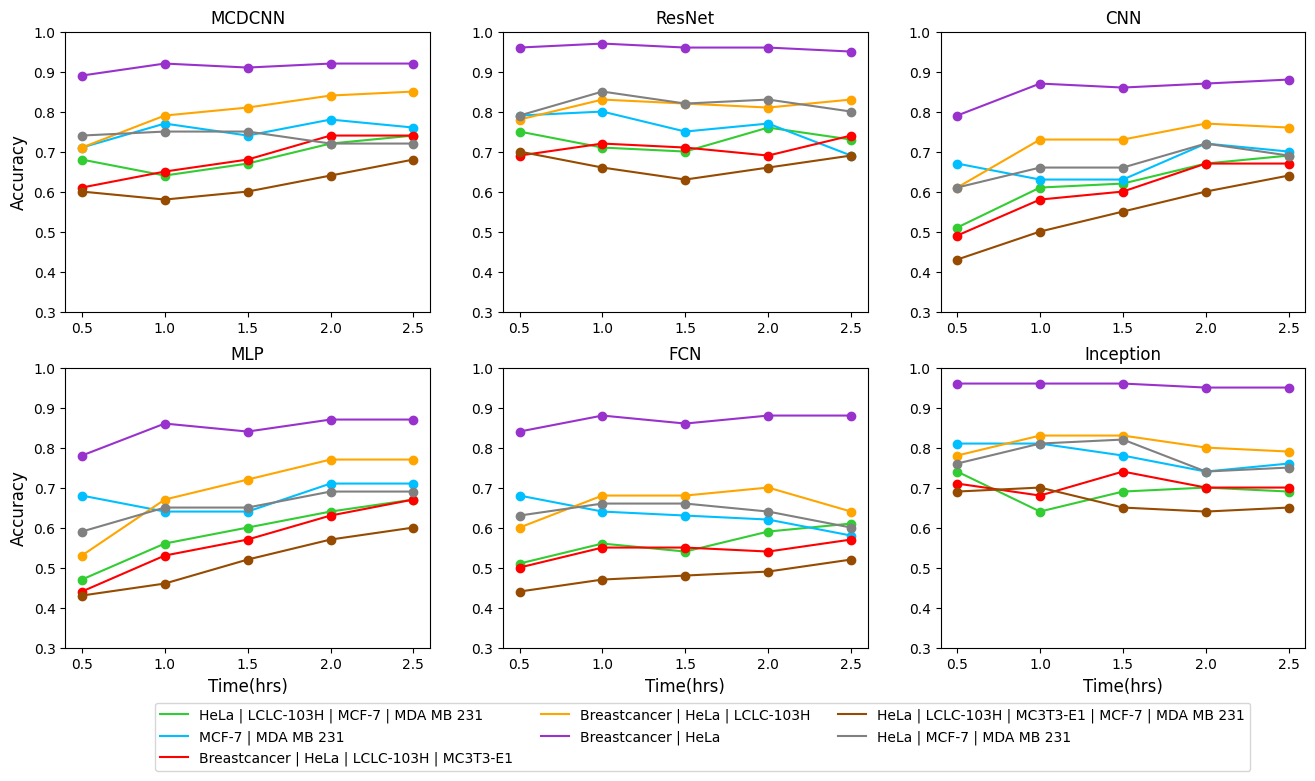

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))

for n, (key, value) in enumerate(stats_dict.items()):
    for m, (m_key, m_value) in enumerate(value.items()):
        ax[n//3, n%3].plot(m_value, c=cm[m], label=format_cell_types(m_key) if n == 0 else None)
        ax[n//3, n%3].plot(m_value, 'o', c=cm[m])
        
    ax[n//3, n%3].set_title(names[key],fontsize=12)
    ax[n//3, n%3].set_ylim((0.3, 1))
    ax[n//3, n%3].set_xticklabels([i*0.5 for i in range(6)])
    if n > 2:
        ax[n//3, n%3].set_xlabel("Time(hrs)",fontsize=12)
    if n == 0 or n == 3:
        ax[n//3, n%3].set_ylabel("Accuracy",fontsize=12)
    if n == 0:
        ax[n//3, n%3].legend(ncol=3, bbox_to_anchor=(0.87, 0.05),
                bbox_transform=fig.transFigure)
plt.savefig('network-compare.jpg', dpi=300)

In [172]:
networks = ['resnet', 'inception', 'mcdcnn']
stats_dict = {}
for nw in networks:
    if not nw in stats_dict:
        stats_dict[nw] = {}
    for tp in MEAS_TYPES:
        if not tp in stats_dict[nw]:
            stats_dict[nw][tp] = {}
        l = []
        for tm in ['1hrs']:    
            precision, accuracy, recall, duration = [], [], [], []
            for fd in VAL_FOLDERS:
                df = pd.read_csv(os.path.join(MEAS_PATH, tm, tp, nw, 'train-test_itr_0', fd, stat_file_name))
                precision.append(df.precision.item())
                accuracy.append(df.accuracy.item())
                recall.append(df.recall.item())
                duration.append(df.duration.item())
            stats_dict[nw][tp][tm] = {
                # 'precision': [np.round(np.mean(precision), 2), np.round(np.std(precision), 2), np.round(np.max(precision), 2)],
                'accuracy': [np.round(np.mean(accuracy), 2), np.round(np.std(accuracy), 2), np.round(np.max(accuracy), 2)],
                # 'recall': [np.round(np.mean(recall), 2), np.round(np.std(recall), 2), np.round(np.max(recall), 2)],
                # 'duration': [np.round(np.mean(duration), 2), np.round(np.std(duration), 2), np.round(np.max(duration), 2)]
            }
            l.append([precision, accuracy, recall, duration])
        e = l[0]
        stats_dict[nw][tp] = {
                'precision': [np.round(np.mean(e[0]),2), np.round(np.std(e[0]),2)],
                'accuracy': [np.round(np.mean(e[1]),2), np.round(np.std(e[1]),2)],
                'recall': [np.round(np.mean(e[2]),2), np.round(np.std(e[2]),2)],
                # 'duration': [[np.mean(e[3]), np.std(e[3]), np.max(e[3])] for e in l]
            }
                    
                
                    
with open('stats.json', 'w') as fp:
    json.dump(stats_dict, 
              fp, 
              sort_keys=False,
              indent=4,
              separators=(',', ': ')
              )

In [174]:
stats_list = []

for tp in MEAS_TYPES:
    for nw in networks:
       row = [format_cell_types(tp), names[nw], stats_dict[nw][tp]['precision'],stats_dict[nw][tp]['accuracy'],stats_dict[nw][tp]['recall']] 
       stats_list.append(row)
       
df = pd.DataFrame(stats_list, columns=['setup', 'network', 'precision', 'accuracy', 'recall'])
df.to_excel('stats.xlsx')
df

,setup,network,precision,accuracy,recall
0,HeLa | MCF-7 | MDA MB 231,ResNet,"[0.85, 0.02]","[0.85, 0.02]","[0.85, 0.02]"
1,HeLa | MCF-7 | MDA MB 231,Inception,"[0.81, 0.04]","[0.81, 0.04]","[0.81, 0.04]"
2,HeLa | MCF-7 | MDA MB 231,MCDCNN,"[0.76, 0.03]","[0.75, 0.03]","[0.75, 0.03]"
3,HeLa | LCLC-103H | MC3T3-E1 | MCF-7 | MDA MB 231,ResNet,"[0.68, 0.04]","[0.66, 0.03]","[0.66, 0.03]"
4,HeLa | LCLC-103H | MC3T3-E1 | MCF-7 | MDA MB 231,Inception,"[0.71, 0.02]","[0.7, 0.02]","[0.7, 0.02]"
5,HeLa | LCLC-103H | MC3T3-E1 | MCF-7 | MDA MB 231,MCDCNN,"[0.6, 0.04]","[0.58, 0.03]","[0.58, 0.03]"
6,MCF-7 | MDA MB 231,ResNet,"[0.8, 0.01]","[0.8, 0.01]","[0.8, 0.01]"
7,MCF-7 | MDA MB 231,Inception,"[0.81, 0.02]","[0.81, 0.02]","[0.81, 0.02]"
8,MCF-7 | MDA MB 231,MCDCNN,"[0.77, 0.02]","[0.77, 0.01]","[0.77, 0.01]"
9,HeLa | LCLC-103H | MCF-7 | MDA MB 231,ResNet,"[0.72, 0.02]","[0.71, 0.03]","[0.71, 0.03]"


In [142]:
names[nw]

'ResNet'